In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
import numpy as np
from torch import nn
from modules import ISAB, PMA, SAB
import random

In [1]:
# read training data from a file
fileNum = 8

# match particle ID with charge
particleChargeDict = {2212:1,-2212:-1,2112:0,-2112:0,211:1,-211:-1,111:0,321:1,-321:-1,130:0,11:-1,-11:1,13:-1,-13:1,15:-1,-15:1,22:0}

# each jet is a sequence of vectors, and each vector represents a constituent particle
# vector shape: [px,py,pz,E,charge]
# sequence shape(x): [[px,py,pz,E,charge],[px,py,pz,E,charge],[px,py,pz,E,charge],...]
# flavor label(y): [1](charm/bottom) or [0](light)
# the number of constituent is not fixed, so the sequence length will change

# list of sequences for building Dataset
jetSetData_x_list_training = []
jetSetData_y_list_training = []

nHeavy = 0
nLight = 0

iii=0
for i_file in range(fileNum):
    lineNo = 0
    filePath = "./simulationData/" + "trainingData" + str(i_file+1) + ".txt"
    dataFile = open(filePath)
    print("begin",filePath)
    while True: # jets loop
        jetSequence_list = []
        jetFlavor = torch.zeros(1)

        dataFileLine = dataFile.readline()
        if dataFileLine == '':
            break
        lineNo += 1
        dataFileLine = dataFileLine.strip()
        lineNums = dataFileLine.split()
        constituentNum = int(lineNums[0])
        quarkID = int(lineNums[1])
        if abs(quarkID)==4 or abs(quarkID)==5 or abs(quarkID)==6:
            jetFlavor[0] = 1
        else:
            jetFlavor[0] = 0
        for i in range(constituentNum): # constituents loop
                dataFileLine = dataFile.readline()
                lineNo += 1
                dataFileLine = dataFileLine.strip()
                lineNums = dataFileLine.split()
                particleVector = torch.zeros(9)
                constituentID = int(lineNums[1])
                particleVector[0] = constituentPx = float(lineNums[2])
                particleVector[1] = constituentPy = float(lineNums[3])
                particleVector[2] = constituentPz = float(lineNums[4])
                particleVector[3] = constituentE  = float(lineNums[5])
                particleVector[4] = particleChargeDict[constituentID]
                particleVector[5] = constituentE  = float(lineNums[6])
                particleVector[6] = constituentE  = float(lineNums[7])
                particleVector[7] = constituentE  = float(lineNums[8])
                particleVector[8] = constituentE  = float(lineNums[9])
                jetSequence_list.append(particleVector)
                
        #if jetFlavor[0] == 1:
           # for i in range(len(jetSequence_list)):
                #jetSequence_list[i][0] = 500
        jetSequence = torch.stack(jetSequence_list, dim=0)

        if jetFlavor[0] == 0:
            p = random.random()
            if p<0.2: # remove some light-flavor data points to accelerate training
                jetSetData_x_list_training.append(jetSequence.float().unsqueeze(0)) # save each input sequence
                jetSetData_y_list_training.append(jetFlavor.float().unsqueeze(0).unsqueeze(0)) # save each output label
                nLight += 1
        elif jetFlavor[0] == 1:
            jetSetData_x_list_training.append(jetSequence.float().unsqueeze(0)) # save each input sequence
            jetSetData_y_list_training.append(jetFlavor.float().unsqueeze(0).unsqueeze(0)) # save each output label
            nHeavy += 1
        iii+=1
        if iii%10000==0:
            print("Reading:",iii)
            print(lineNo)
        if iii==3000000:
            break
    dataFile.close()

#jetSetData_x_training = torch.stack(jetSetData_x_list, dim=0)
#jetSetData_y_training = torch.stack(jetSetData_y_list, dim=0)
print(jetSetData_x_list_training[0],jetSetData_x_list_training[1],jetSetData_x_list_training[2])
print(jetSetData_y_list_training[0],jetSetData_y_list_training[1],jetSetData_y_list_training[2])
print(nLight,nHeavy)

begin ./simulationData/trainingData1.txt


NameError: name 'torch' is not defined

In [2]:
jetSetData_list_training = list(zip(jetSetData_x_list_training, jetSetData_y_list_training))
print(len(jetSetData_list_training))

0


In [ ]:
# read cross-validation data from a file
dataFile = open("./simulationdata/testingData.txt")

# list of sequences for building Dataset
jetSetData_x_list_validation = []
jetSetData_y_list_validation = []

iii=0
while True: # jets loop
    jetSequence_list = []
    jetFlavor = torch.zeros(1)
    dataFileLine = dataFile.readline()
    if dataFileLine == '':
            break
    dataFileLine = dataFileLine.strip()
    lineNums = dataFileLine.split()
    constituentNum = int(lineNums[0])
    quarkID = int(lineNums[1])
    if abs(quarkID)==4 or abs(quarkID)==5 or abs(quarkID)==6:
        jetFlavor[0] = 1
    else:
        jetFlavor[0] = 0
    for i in range(constituentNum): # constituents loop
            dataFileLine = dataFile.readline()
            dataFileLine = dataFileLine.strip()
            lineNums = dataFileLine.split()
            particleVector = torch.zeros(9)
            constituentID = int(lineNums[1])
            particleVector[0] = constituentPx = float(lineNums[2])
            particleVector[1] = constituentPy = float(lineNums[3])
            particleVector[2] = constituentPz = float(lineNums[4])
            particleVector[3] = constituentE  = float(lineNums[5])
            particleVector[4] = particleChargeDict[constituentID]
            particleVector[5] = constituentE  = float(lineNums[6])
            particleVector[6] = constituentE  = float(lineNums[7])
            particleVector[7] = constituentE  = float(lineNums[8])
            particleVector[8] = constituentE  = float(lineNums[9])
            jetSequence_list.append(particleVector)
    #if jetFlavor[0] == 1:
        #for i in range(len(jetSequence_list)):
            #jetSequence_list[i][0] = 500
    
    jetSequence = torch.stack(jetSequence_list, dim=0)

    jetSetData_x_list_validation.append(jetSequence.float().unsqueeze(0)) # save each input sequence
    jetSetData_y_list_validation.append(jetFlavor.float().unsqueeze(0).unsqueeze(0)) # save each output label
    
    iii+=1
    if iii%10000==0:
        print("Reading:",iii)
    if iii==20000:
        break
dataFile.close()

#jetSetData_x_training = torch.stack(jetSetData_x_list, dim=0)
#jetSetData_y_training = torch.stack(jetSetData_y_list, dim=0)
print(jetSetData_x_list_validation[0],jetSetData_x_list_validation[1],jetSetData_x_list_validation[2])
print(jetSetData_y_list_validation[0],jetSetData_y_list_validation[1],jetSetData_y_list_validation[2])

In [ ]:
jetSetData_list_validation = list(zip(jetSetData_x_list_validation, jetSetData_y_list_validation))

In [3]:
# construct the model
class SetTransformer(nn.Module):
    def __init__(
        self,
        dim_input=9,
        num_outputs=1,
        dim_output=1,
        num_inds=32,
        dim_hidden=128,
        num_heads=4,
        ln=False,
    ):
        super(SetTransformer, self).__init__()
        self.enc = nn.Sequential(
            ISAB(dim_input, dim_hidden, num_heads, num_inds, ln=ln),
            ISAB(dim_hidden, dim_hidden, num_heads, num_inds, ln=ln),
        )
        self.dec = nn.Sequential(
            nn.Dropout(),
            PMA(dim_hidden, num_heads, num_outputs, ln=ln),
            nn.Dropout(),
            nn.Linear(dim_hidden, dim_output),
        )

    def forward(self, X):
        return self.dec(self.enc(X))

In [4]:
# a function to calculate accuracy, precision and recall rate
def modelEval(TP,FN,FP,TN):
    if (TP + FN + FP + TN) != 0:
        accuracy = (TP + TN)/(TP + FN + FP + TN)
    else:
        accuracy = -1
    if (TP + FP) != 0:
        precision = (TP)/(TP + FP)
    else:
        precision = -1
    if (TP + FN) != 0:
        recall = (TP)/(TP + FN)
    else:
        recall = -1
    return accuracy,precision,recall

In [5]:
# definition of hyper-parameters
# model
dim_input=9
dim_output=1
num_inds=32
dim_hidden=128
num_heads=4

# for optimizer
learning_rate = 0.01
lr = 0.0005
momentum = 0.5
lambd = 0.001 # regularization
accum_steps=32

In [6]:
# GPU acceleration
device = torch.device("cuda:0")

# model instance
jetClassification = SetTransformer(dim_input=dim_input, 
                                   dim_hidden=dim_hidden, 
                                   dim_output=dim_output, 
                                   num_heads=num_heads, 
                                   num_inds=num_inds)
jetClassification.to(device)

# or load the local model
save_dir = './modelsave/setTransformer_vertex_update.pt'
#jetClassification = torch.load(save_dir)
jetClassification.to(device)

# loss function: BCEWithLogitsLoss
pos_weight = torch.tensor ([7]) 
pos_weight = pos_weight.to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight = pos_weight)

# optimizer = Adam
opt_Adam = torch.optim.Adam(jetClassification.parameters(), lr=lr, betas=(0.9, 0.99), weight_decay=lambd)

In [8]:
num_epoches = 30
for epoch in range(num_epoches):
    jetClassification.train()
    train_loss=0
    train_TP=0 # True:1 Pred:1
    train_FN=0 # True:1 Pred:0
    train_FP=0 # True:0 Pred:1
    train_TN=0 # True:0 Pred:0
    batchNum = 0
    random.shuffle(jetSetData_list_training)
    random.shuffle(jetSetData_list_validation)
    for i_item in range(len(jetSetData_x_list_training)):
        jetSequence,jetLabel = jetSetData_list_training[i_item]
        jetSequence = jetSequence.to(device)
        jetLabel = jetLabel.to(device)
        # forward propagation
        out = jetClassification(jetSequence)
        loss = criterion(out,jetLabel)
        # backward propagation
        loss.backward()
        if i_item % accum_steps == 0 or (i_item+1)==len(jetSetData_x_list_training):
            opt_Adam.step()
            opt_Adam.zero_grad()
            batchNum+=1
            if batchNum%1000==0:
                print("batchNum: ",batchNum)
                train_accuracy,train_precision,train_recall = modelEval(train_TP,train_FN,train_FP,train_TN)
                print('   train_accuracy:{:.4f}  train_precision:{:.4f}  train_recall:{:.4f}  train_loss:{:.4f}'
         .format(train_accuracy,train_precision,train_recall,train_loss))
        train_loss += loss.item()
        # data to evaluate the model
        if out[0][0]>0 and jetLabel[0][0]==1:
            train_TP += 1 
        if out[0][0]<0 and jetLabel[0][0]==1:
            train_FN += 1 
        if out[0][0]>0 and jetLabel[0][0]==0:
            train_FP += 1 
        if out[0][0]<0 and jetLabel[0][0]==0:
            train_TN += 1 
        if(i_item>1):
            break
    # performance on training set
    train_accuracy,train_precision,train_recall = modelEval(train_TP,train_FN,train_FP,train_TN)
    print('epoch:{}  train_accuracy:{:.4f}  train_precision:{:.4f}  train_recall:{:.4f}  train_loss:{:.4f}'
         .format(epoch,train_accuracy,train_precision,train_recall,train_loss))
    loss_list_train.append(train_loss)
    # performance on testing set
    jetClassification.eval()
    test_TP=0 # True:1 Pred:1
    test_FN=0 # True:1 Pred:0
    test_FP=0 # True:0 Pred:1
    test_TN=0 # True:0 Pred:0
    for i_item in range(len(jetSetData_x_list_validation)):
        jetSequence,jetLabel = jetSetData_list_validation[i_item]
        jetSequence = jetSequence.to(device)
        jetLabel = jetLabel.to(device)
        # forward propagation
        out = jetClassification(jetSequence)
        loss = criterion(out, jetLabel)
        # data to evaluate the model
        if out[0][0]>0 and jetLabel[0][0]==1:
            test_TP += 1 
        if out[0][0]<0 and jetLabel[0][0]==1:
            test_FN += 1 
        if out[0][0]>0 and jetLabel[0][0]==0:
            test_FP += 1 
        if out[0][0]<0 and jetLabel[0][0]==0:
            test_TN += 1 
        if(i_item>10000):
            break
    test_accuracy,test_precision,test_recall = modelEval(test_TP,test_FN,test_FP,test_TN)
    print('         test_accuracy:{:.4f}   test_precision:{:.4f}    test_recall:{:.4f}'
         .format(test_accuracy,test_precision,test_recall))


NameError: name 'jetSetData_list_training' is not defined

In [ ]:
# save the model
save_dir = './modelsave/setTransformer_vertex_update.pt'   #保存路径
torch.save(jetClassification, save_dir)

In [194]:
# calculate efficiency/purity against threshold
for threshold in [0.5,0.7,0.9,0.95,0.99,0.996,0.997,0.998,0.999,0.9995]:
    jetClassification.eval()
    random.shuffle(jetSetData_list_validation)
    test_TP=0 # True:1 Pred:1
    test_FN=0 # True:1 Pred:0
    test_FP=0 # True:0 Pred:1
    test_TN=0 # True:0 Pred:0
    for i_item in range(len(jetSetData_x_list_validation)):
        jetSequence,jetLabel = jetSetData_list_validation[i_item]
        jetSequence = jetSequence.to(device)
        jetLabel = jetLabel.to(device)
        # forward propagation
        out = jetClassification(jetSequence)
        loss = criterion(out, jetLabel)
        # data to evaluate the model
        sigmoid = nn.Sigmoid()
        sigmoid.to(device)
        pred = sigmoid(out[0][0])
        true = jetLabel[0][0]
        #threshold = 0.9
        if pred>threshold and int(true)==1:
            test_TP += 1 
        if pred<threshold and int(true)==1:
            test_FN += 1 
        if pred>threshold and int(true)==0:
            test_FP += 1 
        if pred<threshold and int(true)==0:
            test_TN += 1 
        if(i_item>100000):
            break
    print(test_TP,test_FN,test_FP,test_TN)
    test_accuracy,test_precision,test_recall = modelEval(test_TP,test_FN,test_FP,test_TN)
    print('         test_accuracy:{:.4f}   test_precision:{:.4f}    test_recall:{:.4f}'
         .format(test_accuracy,test_precision,test_recall))


244 10 513 19233
         test_accuracy:0.9738   test_precision:0.3223    test_recall:0.9606
239 15 392 19354
         test_accuracy:0.9797   test_precision:0.3788    test_recall:0.9409
235 19 293 19453
         test_accuracy:0.9844   test_precision:0.4451    test_recall:0.9252
233 21 242 19504
         test_accuracy:0.9869   test_precision:0.4905    test_recall:0.9173
195 59 133 19613
         test_accuracy:0.9904   test_precision:0.5945    test_recall:0.7677
113 141 56 19690
         test_accuracy:0.9901   test_precision:0.6686    test_recall:0.4449
80 174 41 19705
         test_accuracy:0.9892   test_precision:0.6612    test_recall:0.3150
60 194 24 19722
         test_accuracy:0.9891   test_precision:0.7143    test_recall:0.2362
34 220 13 19733
         test_accuracy:0.9883   test_precision:0.7234    test_recall:0.1339
20 234 9 19737
         test_accuracy:0.9879   test_precision:0.6897    test_recall:0.0787


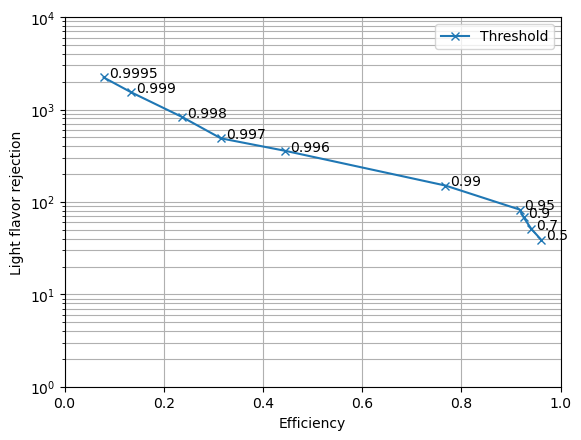

In [214]:
# plot rejection-efficiency
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.yscale("log")
heavy_efficiency_x=[0.9606,0.9409,0.9252,0.9173,0.7677,0.4449,0.3150,0.2362,0.1339,0.0787]
light_efficiency_y=[513,392,293,242,133,56,41,24,13,9]
for i in range(len(light_efficiency_y)):
    light_efficiency_y[i]/=(20+234+9+19737)
    light_efficiency_y[i]=1/light_efficiency_y[i]
plt.plot(heavy_efficiency_x,light_efficiency_y, label = 'Threshold',marker='x')
plt.xlabel('Efficiency')
plt.ylabel("Light flavor rejection")
#plt.title('Absorber Efficiency for Environmental Gamma-rays')
plt.xlim(0, 1)
plt.ylim(1, 1e4)
plt.grid(visible=None, which='major', axis='both')
plt.grid(visible=None, which='minor', axis='both')
temp = [0.5,0.7,0.9,0.95,0.99,0.996,0.997,0.998,0.999,0.9995]
for i in range(len(heavy_efficiency_x)):
    plt.annotate(temp[i], xy=(heavy_efficiency_x[i], light_efficiency_y[i]), xytext=(heavy_efficiency_x[i] + 0.01, light_efficiency_y[i] + 0.01))
plt.legend()
plt.show()

In [ ]:
# plot purity-efficiency
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
efficiency_x=[0.9606,0.9409,0.9252,0.9173,0.7677,0.4449,0.3150,0.2362,0.1339,0.0787]
purity_y=[0.3223,0.3788,0.4451,0.5945,0.6313,0.6686,0.6612,0.7143,0.7234,0.6897]
plt.plot(efficiency_x,purity_y, label = 'Threshold',marker='x')
plt.xlabel('Efficiency')
plt.ylabel("Purity")
#plt.title('Absorber Efficiency for Environmental Gamma-rays')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(visible=None, which='major', axis='both')
plt.grid(visible=None, which='minor', axis='both')
temp = [0.5,0.7,0.9,0.99,0.995,0.996,0.997,0.998,0.999,0.9995]
for i in range(len(efficiency_x)):
    plt.annotate(temp[i], xy=(efficiency_x[i], purity_y[i]), xytext=(efficiency_x[i] + 0.01, purity_y[i] + 0.01))
plt.legend()
plt.show()

In [174]:
# plot AUC 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
random.shuffle(jetSetData_list_training)
random.shuffle(jetSetData_list_validation)
y_true=[]
y_pred=[]
for i_item in range(len(jetSetData_x_list_training)):
        jetSequence,jetLabel = jetSetData_list_training[i_item]
        jetSequence = jetSequence.to(device)
        jetLabel = jetLabel.to(device)
        # forward propagation
        with torch.no_grad():
            out = jetClassification(jetSequence)
            out = F.sigmoid(out)
            y_pred.append(float(out[0][0][0]))
            y_true.append(float(jetLabel[0][0][0]))
        if i_item > 10000:
            break

In [175]:
jetClassification = torch.load(save_dir)
y_true_test=[]
y_pred_test=[]
for i_item in range(len(jetSetData_x_list_validation)):
        jetSequence,jetLabel = jetSetData_list_validation[i_item]
        jetSequence = jetSequence.to(device)
        jetLabel = jetLabel.to(device)
        # forward propagation
        with torch.no_grad():
            out = jetClassification(jetSequence)
            out = F.sigmoid(out)
            #print(jetLabel)
            #print(out)
            if out[0][0][0]>0.8:
                out[0][0][0] = 1
            else:
                out[0][0][0] = 0
            y_pred_test.append(float(out[0][0][0]))
            y_true_test.append(float(jetLabel[0][0][0]))
        if i_item > 10000:
            break

375715
AUC in training set: 0.9760609481608455
AUC in validation set: 0.9591215991384787


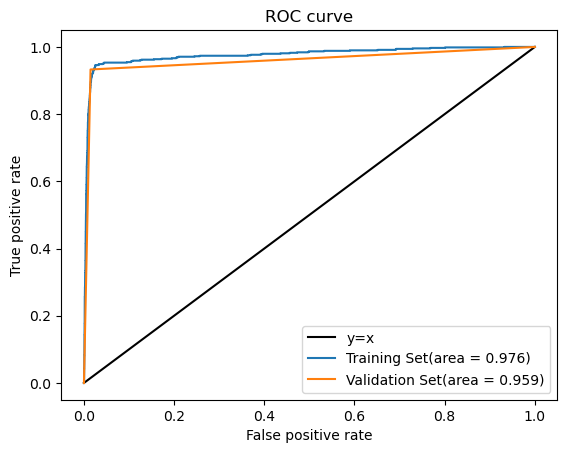

In [176]:
%matplotlib inline
print(len(jetSetData_x_list_training))
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
print("AUC in training set:",roc_auc)

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_true_test, y_pred_test)
roc_auc_test = roc_auc_score(y_true_test, y_pred_test)
print("AUC in validation set:",roc_auc_test)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k-', label = 'y=x')
plt.plot(fpr, tpr, label='Training Set(area = {:.3f})'.format(roc_auc))
plt.plot(fpr_test, tpr_test, label='Validation Set(area = {:.3f})'.format(roc_auc_test))
plt.xlabel('False positive rate')
plt.ylabel("True positive rate")
plt.title('ROC curve')
plt.legend()
plt.show()